<a href="https://www.kaggle.com/code/zlemdilekacar/titanic-eda?scriptVersionId=196877453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

plt.style.use('seaborn-v0_8-whitegrid')
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Load and Check Data

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Variable Descripton

1. PassengerId : unique id number to each passenger
1. Survived : passenger survive(1) or dead (0)
1. Pclass : passenger class
1. Name : name
1. Sex : gender of passenger
1. Age : age of passenger
1. SibSp : number of siblings/spouses
1. Parch : number of parents/children
1. Ticket : ticket number
1. Fare : amount of spent on ticket
1. Cabin : cabin category
1. Embarked : port where passenger embarked (C= Cherbourg, Q=Queenstown, S= Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Variable Analysis

## Categorical Variable Analysis

In [7]:
def bar_plot(variable:str):
    """
    input: variable ex: "Sex"
    output: barplot & value count
    """
    # get feature
    var = train_df[variable]
    
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize 
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    
    print("{}: \n {}".format(variable, varValue))

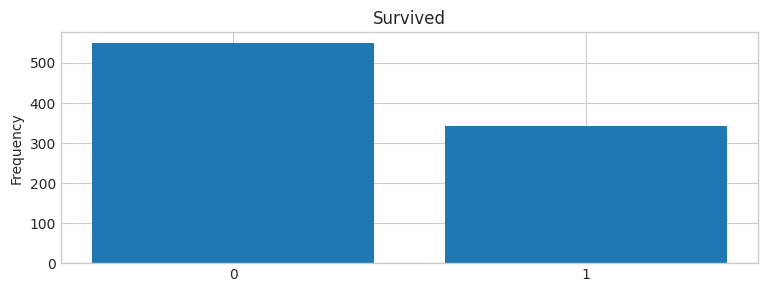

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


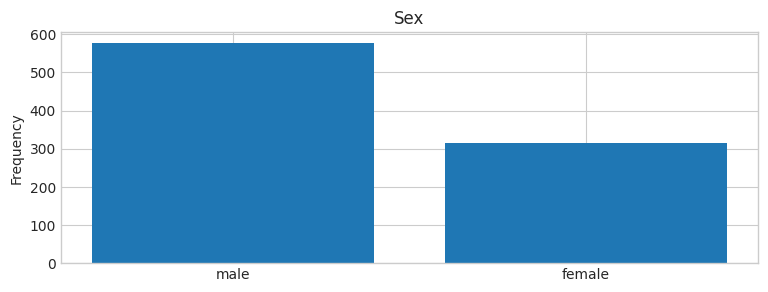

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


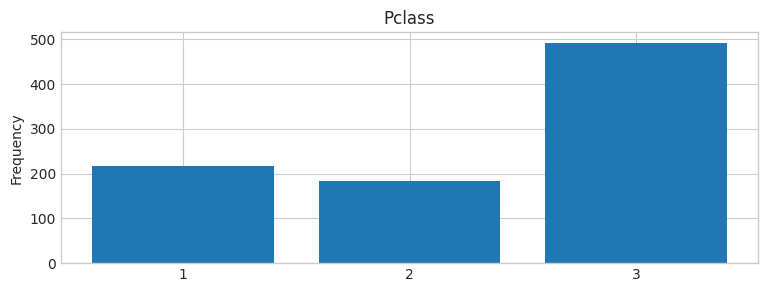

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


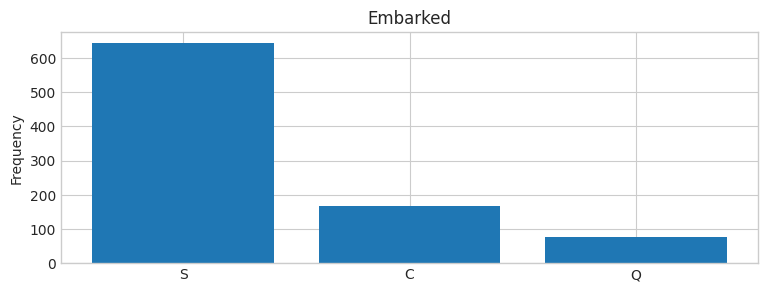

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


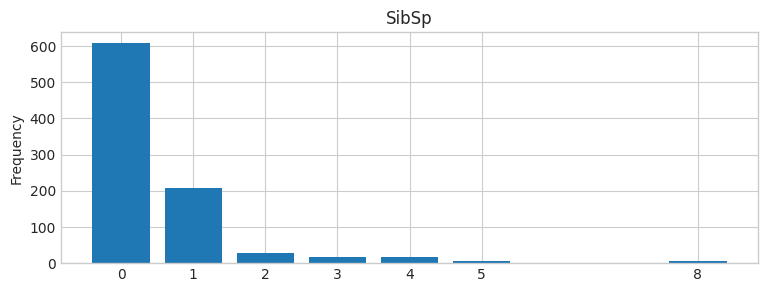

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


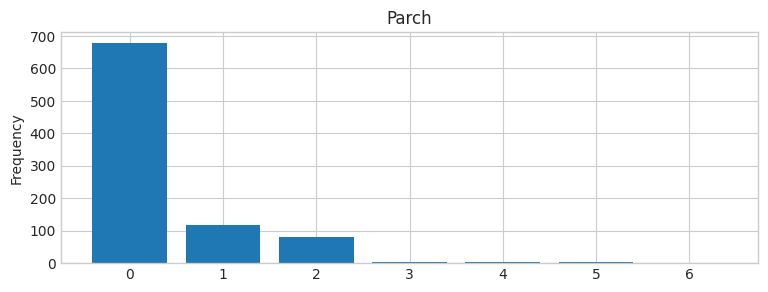

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [8]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

## Numerical Variable Analysis

In [9]:
def plot_hist(variable):
    plt.figure(figsize= (9,3))
    plt.hist(train_df[variable], bins=100)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

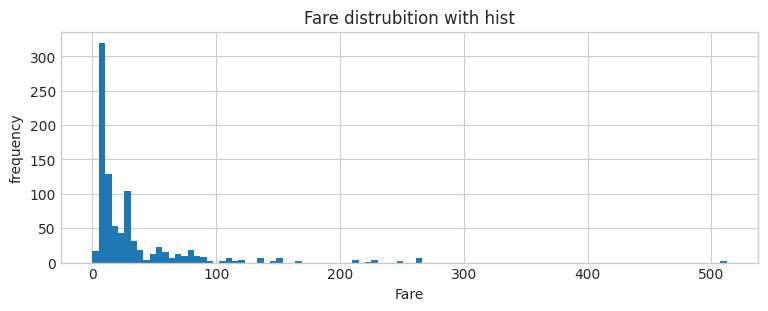

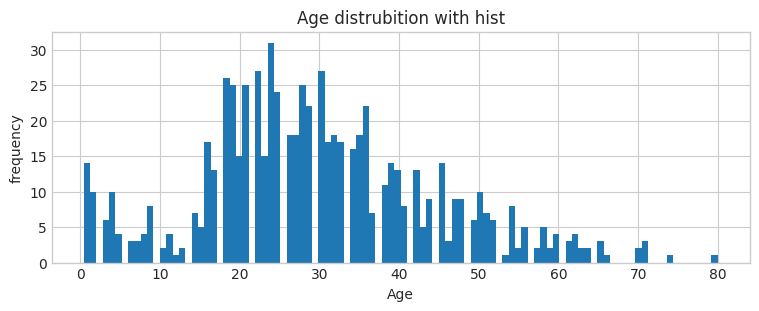

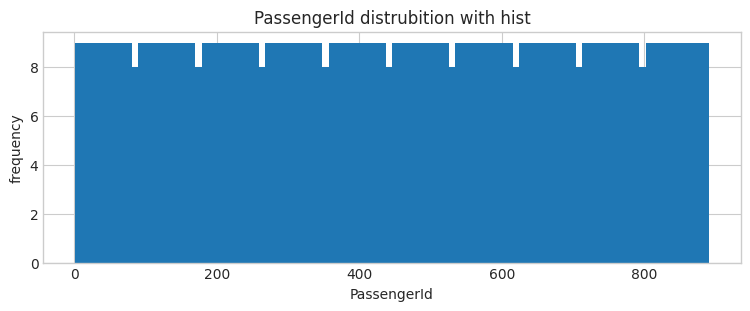

In [10]:
numericVar =["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic Data Analysis

In [11]:
#Pclass vs Survived

train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
#Sex vs Survived

train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
#SibSp vs Survived

train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
#Parch vs Survived

train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outlier Detection

In [15]:
def outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #first quartile
        Q1 = np.percentile(df[c], 25)
        
        #third quartile
        Q3 = np.percentile(df[c], 75)
        
        #IQR
        IQR = Q3 - Q1
        
        #outlier step 
        step = IQR*1.5
        
        # detect 
        
        outlier_list_col = df[(df[c] < Q1 - step) | (df[c]> Q3 + step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v>2)
    return multiple_outliers

In [16]:
train_df.loc[outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


# Missing Value

In [17]:
len_train = len(train_df)
train_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

## Find Missing Value

In [18]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [19]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Fill Missing Value

In [20]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


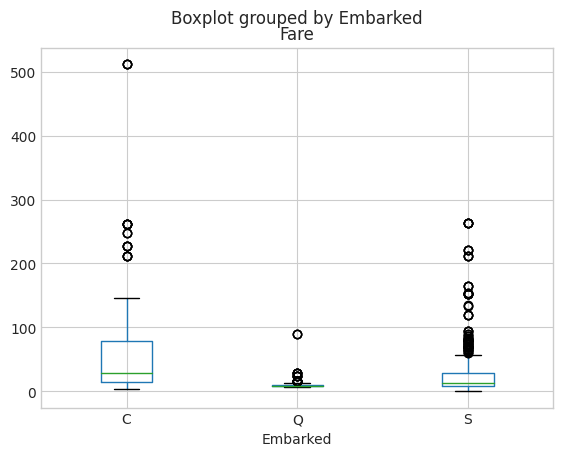

In [21]:
train_df.boxplot(column='Fare', by="Embarked")
plt.show()

In [22]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [24]:
train_df["Fare"] = train_df["Fare"].fillna((np.mean(train_df[train_df["Pclass"]==3]["Fare"])))

# Visualization

## Correlation Between SibSp -- Parch -- Age -- Fare -- Survived

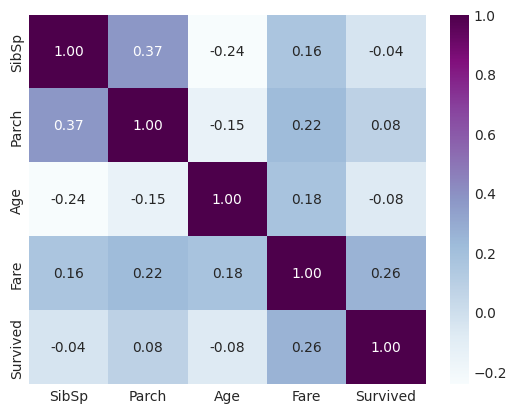

In [25]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f", cmap = "BuPu")
plt.show()

## SibSp -- Survived

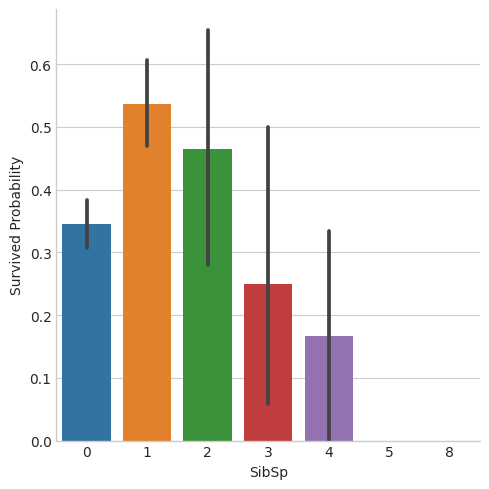

In [26]:
ss = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar")
ss.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if SibSp == 0 or 1 or 2, passenger has more chance to survive


## Parch -- Survived

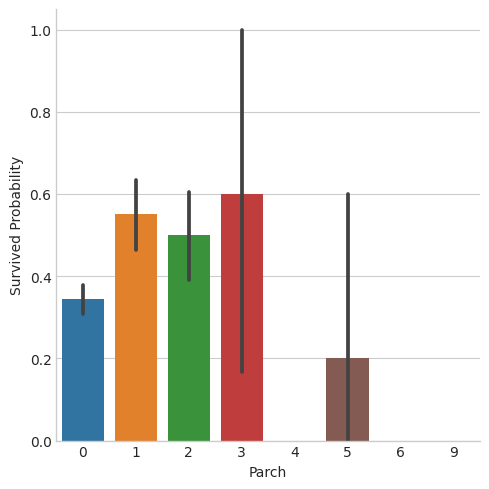

In [27]:
ps = sns.catplot(x = "Parch", y = "Survived", data = train_df, kind = "bar")
ps.set_ylabels("Survived Probability")
plt.show()

* SibSp and Parch can be used for new feature extraction with th = 3
* Small families have more chance to survive.
* There is a std in survial of passenger with Parch = 3

## Pclass -- Survived

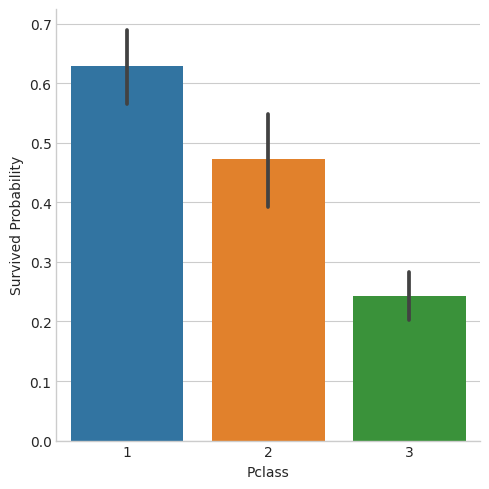

In [28]:
pcs = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar")
pcs.set_ylabels("Survived Probability")
plt.show()

## Age -- Survived

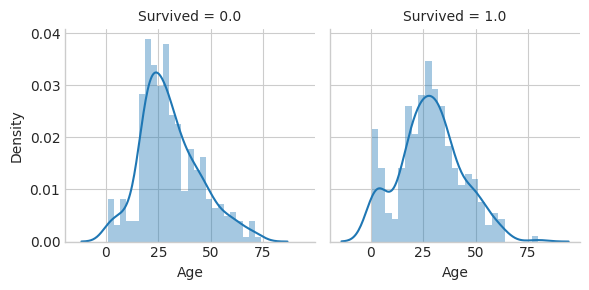

In [29]:
ags = sns.FacetGrid(train_df, col = "Survived")
ags.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate.
* oldest passenger survived.
* large number of 20 years old did not survive.
* most passenger are in 15 - 35 range.
* use age feature in training
* use age distrubition for missing values of age.

## Pclass -- Survived -- Age

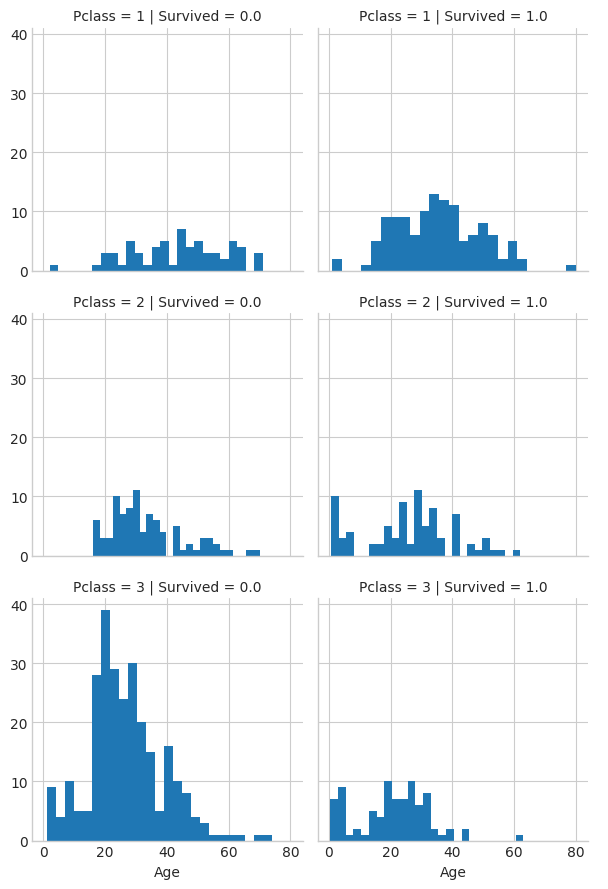

In [30]:
psa = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
psa.map(plt.hist, "Age", bins = 25)
psa.add_legend()
plt.show()

* Pclass is an important feature for model training.

## Embarked -- Sex -- Pclass -- Survived

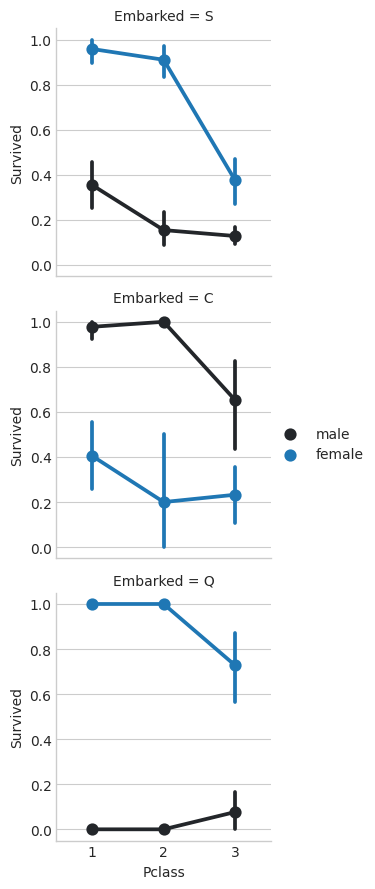

In [31]:
esps = sns.FacetGrid(train_df, row = "Embarked")
esps.map(sns.pointplot, "Pclass", "Survived", "Sex")
esps.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survival rate in pclass 3 in C.
* embarked and sex will be used in training

## Embarked -- Sex -- Fare -- Survived

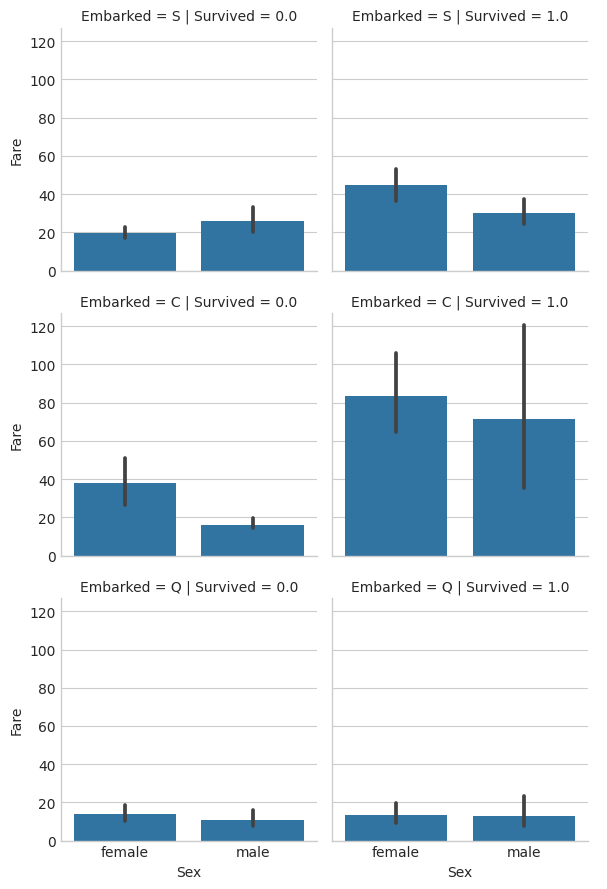

In [32]:
esfs = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")
esfs.map(sns.barplot, "Sex", "Fare")
esfs.add_legend()
plt.show()

* passengers who pay higher fare have better survival. fare can be used as categorical for training.

## Fill Missing : Age Feature

In [33]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


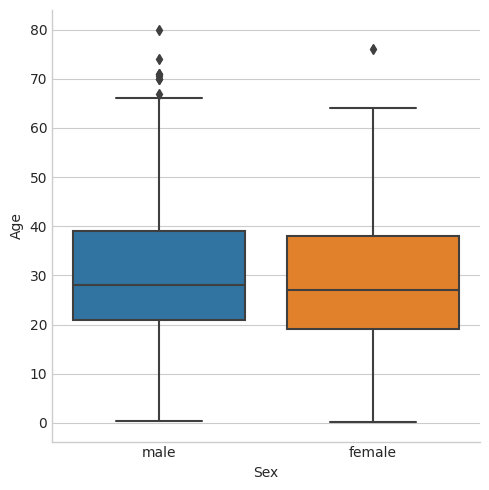

In [34]:
sns.catplot(x = "Sex", y="Age", data = train_df, kind = "box")
plt.show()

* sex is not informative for age prediction. age distrubition seems to be same.

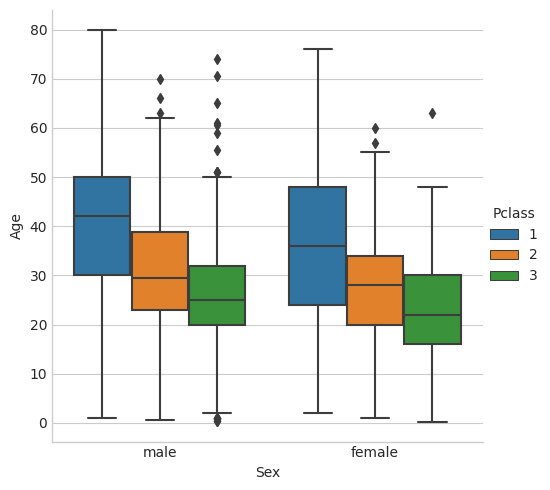

In [35]:
sns.catplot(x = "Sex", y="Age", hue = "Pclass", data = train_df, kind = "box")
plt.show()

* first class passengers are older than second class passengers and second class passengers are older than third class passengers.

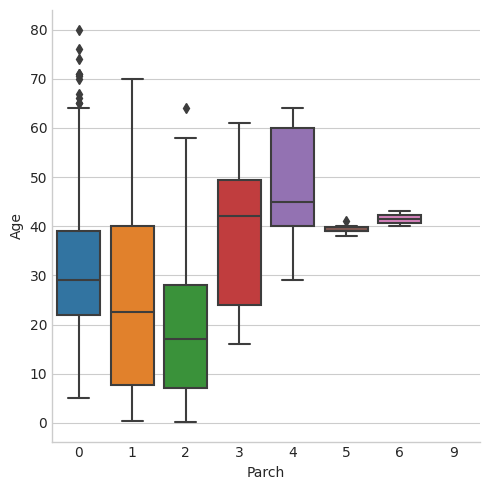

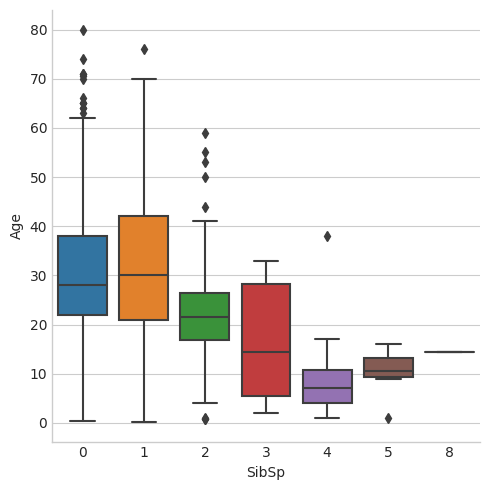

In [36]:
sns.catplot(x = "Parch", y="Age",  data = train_df, kind = "box")
sns.catplot(x = "SibSp", y="Age",  data = train_df, kind = "box")

plt.show()

In [37]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

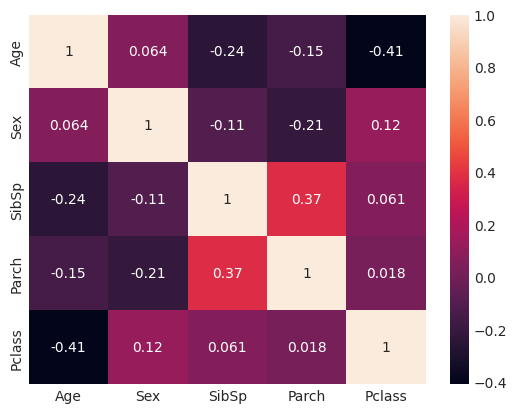

In [38]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot=True)
plt.show()

In [39]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][(train_df["SibSp"]== train_df.iloc[i]["SibSp"]) &  (train_df["Parch"]== train_df.iloc[i]["Parch"]) & (train_df["Pclass"]== train_df.iloc[i]["Pclass"])]
    age_med = train_df["Age"].median()
    
    if not np.isnan(age_pred[i]):
        train_df["Age"].iloc[i] = age_pred

    else:
        train_df["Age"].iloc[i] = age_med

# Feature Engineering

## Name -- Title

In [40]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [41]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [42]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

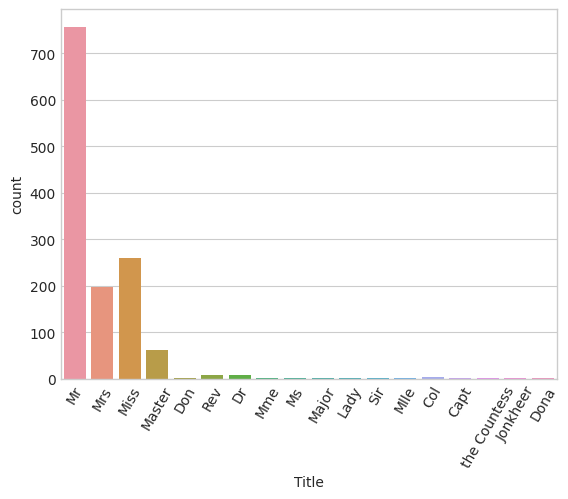

In [43]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [44]:
#convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]

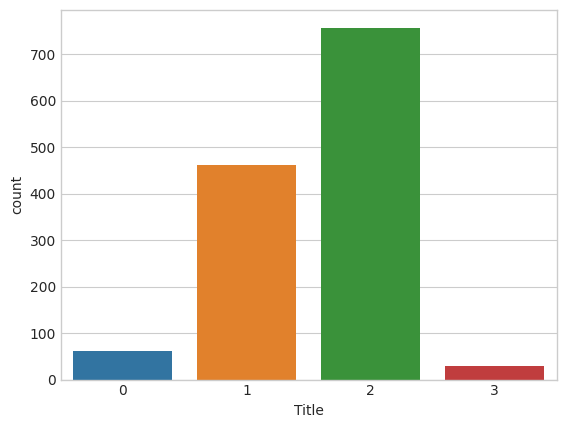

In [45]:
sns.countplot(x="Title", data = train_df)
plt.xticks()
plt.show()

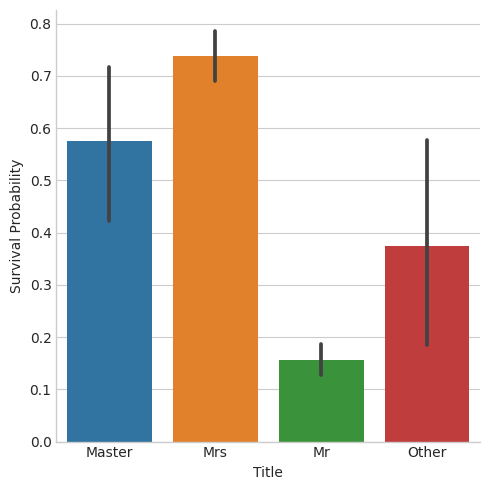

In [46]:
t = sns.catplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
t.set_xticklabels(["Master",  "Mrs", "Mr", "Other"])
t.set_ylabels("Survival Probability")
plt.show()

In [47]:
train_df.drop(labels = ["Name"], axis = 1 , inplace=True)

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [49]:
train_df = pd.get_dummies(train_df, columns = ["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


## Family Size

In [50]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


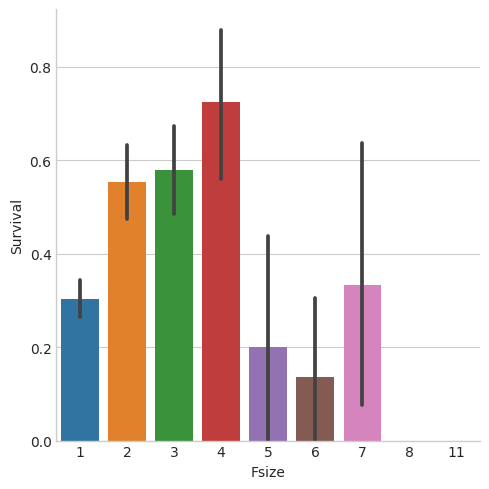

In [52]:
fsize = sns.catplot(x= "Fsize", y = "Survived", data = train_df, kind = "bar")
fsize.set_ylabels("Survival")
plt.show()

In [53]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [54]:
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0.0,3,1,28.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


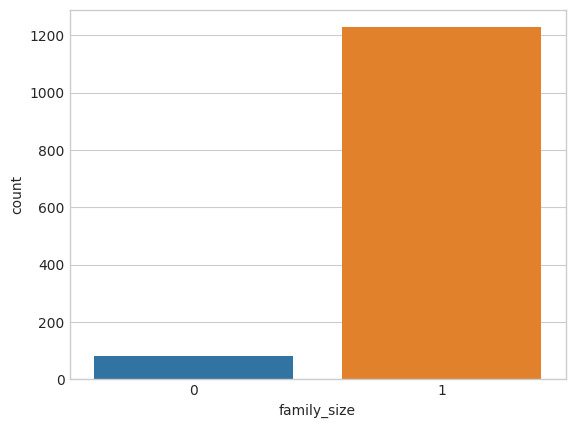

In [55]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

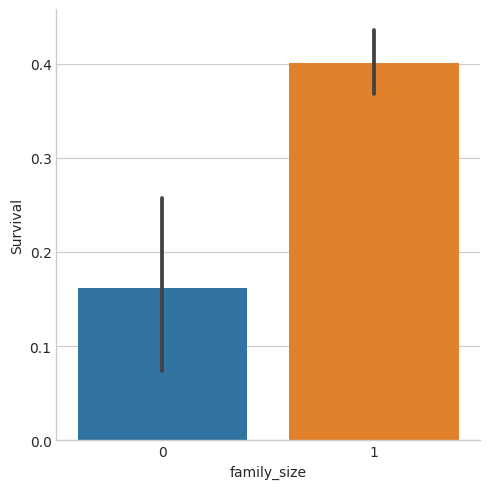

In [56]:
fsize = sns.catplot(x= "family_size", y = "Survived", data = train_df, kind = "bar")
fsize.set_ylabels("Survival")
plt.show()

small families have more chance to survive than large families.

In [57]:
train_df = pd.get_dummies(train_df, columns = ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


## Embarked

In [58]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

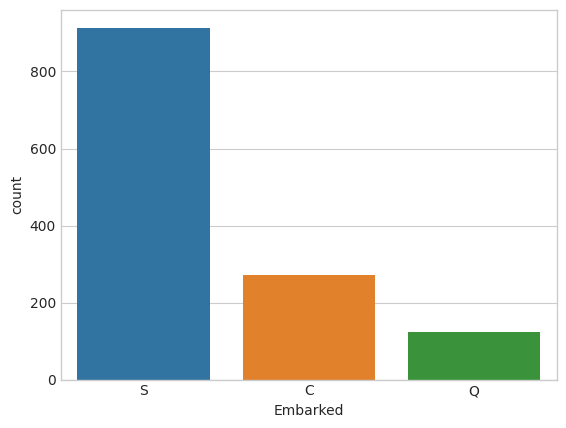

In [59]:
sns.countplot(x = 'Embarked', data = train_df)

In [60]:
train_df = pd.get_dummies(train_df, columns = ["Embarked"]) 
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


## Ticket

In [61]:
train_df['Ticket'].head(30)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
Name: Ticket, dtype: object

In [62]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/", "").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [63]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [64]:
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,0,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,0,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0.0,3,1,28.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0.0,1,1,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0.0,3,1,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1.0,3,0,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1.0,2,0,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


## Pclass

In [65]:
train_df.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

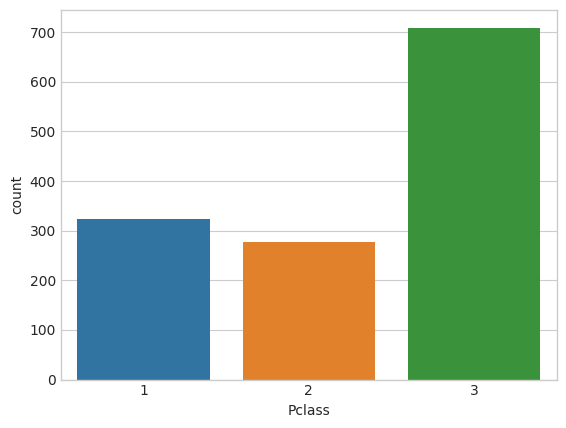

In [66]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [67]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns = ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,0,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,0,26.0,0,0,7.9250,NaN,False,True,...,False,True,False,False,False,False,False,False,False,True
3,4,1.0,0,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0.0,1,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


## Sex

In [68]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns = ["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1.0,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1.0,26.0,0,0,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,4,1.0,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0.0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


## Drop PassengerID & Cabin

In [69]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace=True)
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0.0,22.0,1,0,7.2500,False,False,True,False,2,...,False,False,False,False,False,False,False,True,False,True
1,1.0,38.0,1,0,71.2833,False,True,False,False,2,...,False,False,False,False,False,True,False,False,True,False
2,1.0,26.0,0,0,7.9250,False,True,False,False,1,...,False,False,False,False,False,False,False,True,True,False
3,1.0,35.0,1,0,53.1000,False,True,False,False,2,...,False,False,False,False,True,True,False,False,True,False
4,0.0,35.0,0,0,8.0500,False,False,True,False,1,...,False,False,False,False,True,False,False,True,False,True
